In [78]:
#Call Library
import pandas as pd
import matplotlib.pyplot as plt
# Read In Data
df = pd.read_csv("21.csv",na_values="?")
df

,order_reference,order_status,type,parent_item_sku,status,sku,name,name_localized,unit_price,unit_cost,quantity,total_price,total_cost,discount_amount,discount_name,tax_exclusive_unit_price,tax_exclusive_total_price,tax_exclusive_discount_amount,total_taxes,business_date
0,4086458,Done,Product,NaN,Done,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.91304,2022/01/01
1,4086458,Done,Product,NaN,Void,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.00000,2022/01/01
2,4086458,Done,Product,NaN,Void,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.00000,2022/01/01
3,4086458,Done,Modifier Option,1111016.0,Done,1113011,Full Fat Milk,حليب كامل الدسم,0,0.000,1,0,0.0000,-,-,0.00000,0.00000,0,0.00000,2021/12/31
4,4086458,Done,Product,NaN,Done,1111008,Autumn Latte - Regular,أوتوم لاتيه - صغير,13,0.524,1,13,0.5244,0,-,11.30435,11.30435,0,1.69565,2021/12/31
5,4086603,Done,Product,NaN,Done,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.91304,2022/01/01
6,4086603,Done,Product,NaN,Void,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.00000,2022/01/01
7,4086604,Done,Product,NaN,Void,1111013,Drip Coffee,قهوة مقطرة,7,0.000,1,7,0.0000,0,-,6.08696,6.08696,0,0.00000,2022/01/01


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_reference                8 non-null      int64  
 1   order_status                   8 non-null      object 
 2   type                           8 non-null      object 
 3   parent_item_sku                1 non-null      float64
 4   status                         8 non-null      object 
 5   sku                            8 non-null      int64  
 6   name                           8 non-null      object 
 7   name_localized                 8 non-null      object 
 8   unit_price                     8 non-null      int64  
 9   unit_cost                      8 non-null      float64
 10  quantity                       8 non-null      int64  
 11  total_price                    8 non-null      int64  
 12  total_cost                     8 non-null      float64

In [80]:
df.order_reference.mean()

4086512.5

In [81]:
df.groupby('sku').order_reference.mean()

sku
1111008    4.086458e+06
1111013    4.086531e+06
1113011    4.086458e+06
Name: order_reference, dtype: float64

In [82]:
df[df.total_taxes=='0'].order_reference.mean()

nan

In [83]:
df.groupby('total_cost').order_reference.max()

total_cost
0.0000    4086604
0.5244    4086458
Name: order_reference, dtype: int64

In [84]:
df.groupby('total_cost').order_reference.min()

total_cost
0.0000    4086458
0.5244    4086458
Name: order_reference, dtype: int64

In [85]:
df.groupby('total_cost').order_reference.agg(['count','min','max','mean'])

,count,min,max,mean
total_cost,,,,
0.0000,7,4086458,4086604,4.086520e+06
0.5244,1,4086458,4086458,4.086458e+06


In [86]:
df.groupby('unit_price').mean()

,order_reference,parent_item_sku,sku,unit_cost,quantity,total_price,total_cost,tax_exclusive_unit_price,tax_exclusive_total_price,tax_exclusive_discount_amount,total_taxes
unit_price,,,,,,,,,,,
0,4.086458e+06,1111016.0,1113011.0,0.000,1.0,0.0,0.0000,0.00000,0.00000,0.0,0.000000
7,4.086531e+06,NaN,1111013.0,0.000,1.0,7.0,0.0000,6.08696,6.08696,0.0,0.304347
13,4.086458e+06,NaN,1111008.0,0.524,1.0,13.0,0.5244,11.30435,11.30435,0.0,1.695650


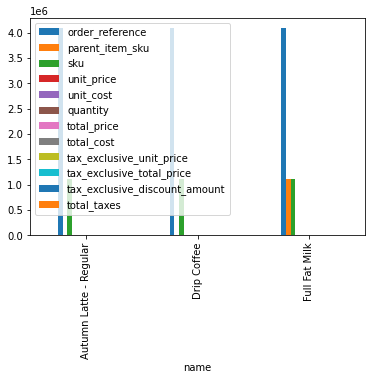

In [87]:
df.groupby('name').mean().plot(kind='bar')

In [88]:
# Groupby - Single Group Single Column
df.groupby(['order_reference'])['sku'].sum()

order_reference
4086458    5557058
4086603    2222026
4086604    1111013
Name: sku, dtype: int64

In [89]:
# Groupby - Multiple Columns
df.groupby(['order_reference'])[['sku','parent_item_sku']].sum()

,sku,parent_item_sku
order_reference,,
4086458,5557058,1111016.0
4086603,2222026,0.0
4086604,1111013,0.0


In [90]:
# Groupby - Multiple Groups
df.groupby(['order_reference','order_status'])[['sku','parent_item_sku']].sum()

,,sku,parent_item_sku
order_reference,order_status,,
4086458,Done,5557058,1111016.0
4086603,Done,2222026,0.0
4086604,Done,1111013,0.0


In [91]:
# Groupby - Multiple Groups As Columns
df.groupby(['order_reference','order_status'],as_index=False)['sku'].sum()

,order_reference,order_status,sku
0,4086458,Done,5557058
1,4086603,Done,2222026
2,4086604,Done,1111013


In [92]:
# Multiple Function
df.groupby(['order_reference'])['sku'].agg(['mean','sum'])

,mean,sum
order_reference,,
4086458,1111411.6,5557058
4086603,1111013.0,2222026
4086604,1111013.0,1111013


In [93]:
df.groupby(['tax_exclusive_unit_price'])['order_status'].sum()

tax_exclusive_unit_price
0.00000                         Done
6.08696     DoneDoneDoneDoneDoneDone
11.30435                        Done
Name: order_status, dtype: object

In [94]:
df.columns

Index(['order_reference', 'order_status', 'type', 'parent_item_sku', 'status',
       'sku', 'name', 'name_localized', 'unit_price', 'unit_cost', 'quantity',
       'total_price', 'total_cost', 'discount_amount', 'discount_name',
       'tax_exclusive_unit_price', 'tax_exclusive_total_price',
       'tax_exclusive_discount_amount', 'total_taxes', 'business_date'],
      dtype='object')

In [95]:
df.name

0               Drip Coffee
1               Drip Coffee
2               Drip Coffee
3             Full Fat Milk
4    Autumn Latte - Regular
5               Drip Coffee
6               Drip Coffee
7               Drip Coffee
Name: name, dtype: object

In [96]:
df[df['name'] == 'Drip Coffee']['unit_price'].sum()

42

In [97]:
for name in set(df.name):
  print('name: ', name)
  print('# of items: ', len(df[df['name'] == name]))
  print('total cost: ', df[df['name'] == name]['unit_price'].sum())
  print('-'*50)

name:  Autumn Latte - Regular
# of items:  1
total cost:  13
--------------------------------------------------
name:  Full Fat Milk
# of items:  1
total cost:  0
--------------------------------------------------
name:  Drip Coffee
# of items:  6
total cost:  42
--------------------------------------------------


In [110]:
df.groupby('name', as_index=False)[['quantity', 'unit_price', 'total_price', 'total_cost']].sum()

,name,quantity,unit_price,total_price,total_cost
0,Autumn Latte - Regular,1,13,13,0.5244
1,Drip Coffee,6,42,42,0.0000
2,Full Fat Milk,1,0,0,0.0000
